In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 MB 3.7 MB/s eta 0:00:0000:0100:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.4 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 8.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 14.2 MB/s eta 0:00:0000:0100:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 13.8 MB/s eta 0:00:0000:0100:01
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 KB 13.7 MB/s eta 0:00:00a 0:00:01
  Using cached h5py-3.6.0-cp37-cp37m-macosx_10_9_x86_64.whl (3.1 MB)
  Using cached 

In [4]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

In [5]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_train_flatten.shape

# x_test_flatten = x_test.reshape(x_test.shape[0], -1)

(60000, 784)

In [6]:
from griddify import FeatureDistances

fd = FeatureDistances(metric="cosine").calculate(x_train_flatten)

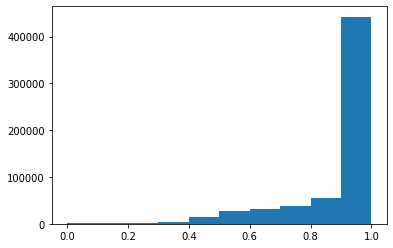

In [7]:
plt.hist(fd.to_numpy().flatten().tolist())
plt.show()

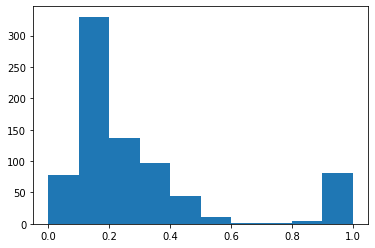

In [8]:
minimums = []
for i in range(fd.shape[0]):
    row = fd[i].to_numpy()
    minimums.append(np.min(row[np.nonzero(row)]))

plt.hist(minimums)
plt.show()

In [9]:
from griddify import Tabular2Cloud

tc = Tabular2Cloud()
tc.fit(fd)
Xc = tc.transform(fd)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<AxesSubplot:>

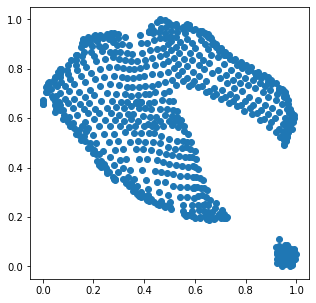

In [10]:
from griddify.plots import cloud_plot

cloud_plot(Xc)

In [11]:
from griddify import Cloud2Grid

cg = Cloud2Grid(max_side=128)
cg.fit(Xc)
Xg = cg.transform(Xc, as_integers=False)

<AxesSubplot:>

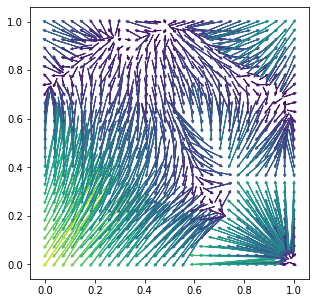

In [12]:
from griddify.plots import arrows_plot

arrows_plot(Xc, Xg, capping_distance=0.5)

In [13]:
mappings, side = cg.get_mappings(Xc)

In [14]:
from griddify import Flat2Grid

tg = Flat2Grid(mappings, side)
Xi = tg.transform(x_train_flatten)

100%|█████████████████████████████████████| 60000/60000 [13:18<00:00, 75.12it/s]


KeyboardInterrupt: 

<AxesSubplot:>

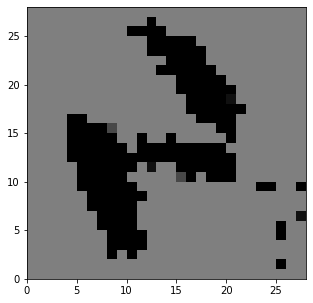

In [16]:
from griddify.plots import grid_plot

grid_plot(Xi[0], cmap="gray_r")

<Figure size 864x720 with 0 Axes>

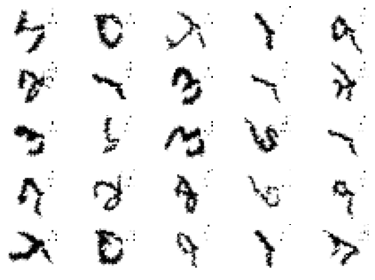

In [14]:
plt.figure(figsize=(12, 10))
fig, ax_array = plt.subplots(5, 5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(Xi[i].T, cmap="gray_r")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

<Figure size 864x720 with 0 Axes>

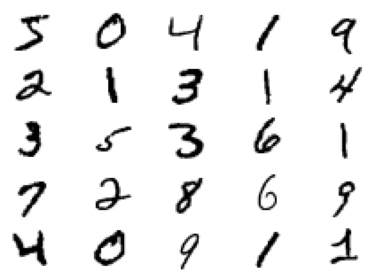

In [15]:
plt.figure(figsize=(12, 10))
fig, ax_array = plt.subplots(5, 5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap="gray_r")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)